## Import some things we'll need and set some plot options

In [1]:
# fix for display issue
import xarray as xr
import numpy as np
import intake
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

## Data access is as easy as installing a package

In [2]:
## Un-comment to use your prefered package manager.
# %pip install intake_informaticslab --upgrade
# %conda install intake_informaticslab --upgrade

## Explore the datasets avaliable

In [3]:
def print_cat_items(cat, indent=0):
    if(isinstance(cat, intake.catalog.Catalog)):
        for cat_item in list(cat):
            print(" "*indent + cat_item)
            print_cat_items(cat[cat_item], indent+2)

print_cat_items(intake.cat)

met_office
  air_quality
    air_quality_hourly
    air_quality_daily
  weather_forecasts
    mogreps_uk
      single_level
      height_level
      pressure_level
      depth_level
    mogreps_g
      single_level
      height_level
      pressure_level
      depth_level
  weather_continuous_timeseries
    ukv_daily_timeseries
    ukv_hourly_timeseries


## Some datasets might require acceptin a licence

### A `LicenseNotExceptedError` will be raised if a licence needs accepting

In [4]:
## This line would raise a LicenseNotExceptedError
intake.cat.met_office.weather_forecasts.mogreps_g.single_level.to_dask()

LicenseNotExceptedError: Please acknowledge your acceptance of the 'Creative Commons licence (https://creativecommons.org/licenses/by-nc-nd/4.0/)' with the keyword argument `license_accepted=True`.' 

### View the dataset's license

In [5]:
intake.cat.met_office.weather_forecasts.mogreps_g.single_level.license

'Creative Commons licence (https://creativecommons.org/licenses/by-nc-nd/4.0/)'

### Accept the license with the `license_accepted` flag

In [6]:
intake.cat.met_office.weather_forecasts.mogreps_g.single_level(license_accepted=True).to_dask()

,Array,Chunk
Bytes,2.17 TB,88.47 MB
Shape,"(193, 127, 18, 960, 1280)","(1, 1, 18, 960, 1280)"
Count,24512 Tasks,24511 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,2.17 TB,88.47 MB
Shape,"(193, 127, 18, 960, 1280)","(1, 1, 18, 960, 1280)"
Count,24512 Tasks,24511 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


## Some examples using the air_quality dataset

Load...

In [7]:
aq_ds = intake.cat.met_office.air_quality.air_quality_hourly.read_chunked()
aq_ds

<xarray.Dataset>
Dimensions:                  (projection_x_coordinate: 548, projection_y_coordinate: 704, time: 9064)
Coordinates:
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.38e+05 ... ...
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.84e+05 ... ...
  * time                     (time) datetime64[ns] 2020-01-01 ... 2021-01-12T...
Data variables:
    no2                      (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>
    o3                       (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>
    pm10                     (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>
    pm2p5                    (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>
    so2                      (time, projection_y_coordinate, projection_x_coordinate) float32 dask.array<chunksize=(24, 704, 548), meta=np.ndarray>

Give some highlevel information on the dataset

In [8]:
print("For the whole air quality dataset above:")
print(f"\tNumber of points {np.product(aq_ds[list(aq_ds.data_vars)[0]].shape) * len(aq_ds.data_vars):,}")
print(f"\tApprox uncompressed data volumes = {len(aq_ds.data_vars)* np.product(aq_ds[list(aq_ds.data_vars)[0]].shape) * 32  / 10**9:.1f}GB")
print("")
print("For one parameter (e.g. Nitrus Oxide):")
print(f"\tNumber of points {np.product(aq_ds[list(aq_ds.data_vars)[0]].shape) :,}")
print(f"\tApprox uncompressed data volumes = {np.product(aq_ds[list(aq_ds.data_vars)[0]].shape) * 32  / 10**9:.1f}GB")

For the whole air quality dataset above:
	Number of points 17,484,093,440
	Approx uncompressed data volumes = 559.5GB

For one parameter (e.g. Nitrus Oxide):
	Number of points 3,496,818,688
	Approx uncompressed data volumes = 111.9GB


### Show some plots

#### What was the Nitrus Oxide levels like on 01/02/20 at lunchtime?

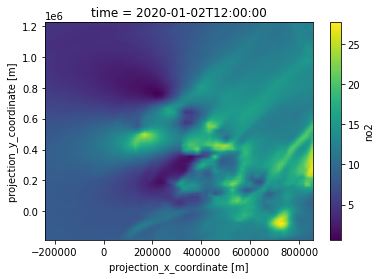

In [9]:
aq_ds.no2.sel(time="01/02/20T12:00").plot()

#### What was the max NO levels in Feb?

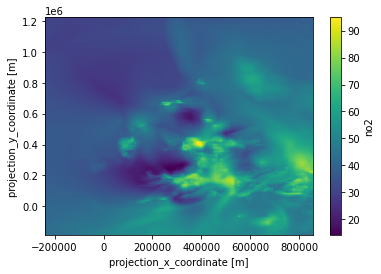

In [11]:
aq_ds.no2.sel(time=slice("01/02/20T00:00:00","28/02/20T23:59:59")).max(dim='time').plot()